In [ ]:
# BAD : 1 = client defaulted on loan 0 = loan repaid 
# LOAN : Amount of the loan request
# MORTDUE : Amount due on existing mortgage
# VALUE : Value of current property
# REASON : DebtCon = debt consolidation HomeImp = home improvement
# JOB : Six occupational categories
# YOJ : Years at present job
# DEROG : Number of major derogatory reports
# DELINQ : Number of delinquent credit lines
# CLAGE : Age of oldest trade line in months
# NINQ : Number of recent credit lines
# CLNO : Number of credit lines
# DEBTINC : Debt-to-income ratio

/////////////////////////////////////////////

# BAD: değişkeni veri setinde hedef değişkenidir. '1' kişinin borcunu zamanında ödemediği durum. '0' kredi borcunu zamanında ödemiş.
# LOAN: Bankadan talep ettiği kredi miktarı
# MORTDUE: İpotek için ödemesi gereken tutar
# VALUE: Müşterinin geçerli mülk değeri
# REASON: DebtCont= diğer borç yükümlülükleri için alınan borç. HomeImp= Kişisel ev ihtiyaçları için alınan borç
# JOB: Müşterinin meslek (kategorik veri)
# YOJ: Mevcut mesleğinde kaç yıldır çalışıyor
# DEROG: Kredi almasını etkileyen önemli zararlı/uygunsuz rapor sayısı
# DELINQ: Zamanında ödenmemiş kredi sayısı
# CLAGE: Aylar içinde en eski kredi limitinin yaşı
# NINQ: Kredi ile ilgili son yapılan sorgu sayısı
# CLNO: Kredi limitinin sayısı
# DEBTINC: Müşterinin borç-gelir oranı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame


In [2]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
df = data.copy()

In [5]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [6]:
df.tail()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN
3575,1,5900,NaN,28000.0,DebtCon,Self,1.0,2.0,1.0,36.77,1.0,8.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [8]:
df.dtypes


#reason ve job kategorik değişken

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [9]:
df.shape

(3576, 13)

In [10]:
df.columns

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [11]:
df.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [13]:
df.describe(include = "all").T

#kategorik değerler de girilmiş

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bad,3576,NaN,NaN,NaN,0.199385,0.399594,0,0,0,0,1
loan,3576,NaN,NaN,NaN,18529.7,11262.8,1100,11000,16200,23100,89900
mortdue,3262,NaN,NaN,NaN,74013.9,44016.8,2619,46700.2,65858,91717,399550
value,3512,NaN,NaN,NaN,101077,54865.3,8800,65753,89183,118928,850000
reason,3429,2,DebtCon,2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,3409,6,Other,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yoj,3264,NaN,NaN,NaN,8.83264,7.56805,0,3,7,13,41
derog,3149,NaN,NaN,NaN,0.26167,0.865178,0,0,0,0,10
delinq,3225,NaN,NaN,NaN,0.432558,1.09923,0,0,0,0,15
clage,3397,NaN,NaN,NaN,179.833,87.0662,0.49,115.6,173.64,230.71,1168.23


In [14]:
#hiç eksik gözlem(değer) var mı
df.isnull().values.any()

True

In [15]:
#hangi değişkende kaçar tane var
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [16]:
kat_deg = df.select_dtypes(include = ['object'])
kat_deg

,reason,job
0,HomeImp,NaN
1,DebtCon,NaN
2,DebtCon,NaN
3,DebtCon,NaN
4,DebtCon,NaN
...,...,...
3571,DebtCon,Self
3572,DebtCon,Self
3573,DebtCon,Self
3574,HomeImp,Self


In [17]:
kat_deg.job.unique()

array([nan, 'Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'],
      dtype=object)

In [18]:
kat_deg["job"].value_counts().count()

#6 farklı job değeri var

6

In [19]:
kat_deg["job"].value_counts()

Other     1431
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64

In [20]:
kat_deg.reason.unique()

array(['HomeImp', 'DebtCon', nan], dtype=object)

In [21]:
kat_deg["reason"].value_counts().count()

2

In [22]:
kat_deg["reason"].value_counts()

DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64

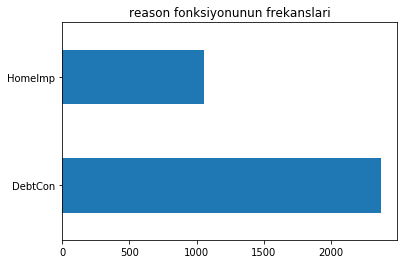

In [23]:
df["reason"].value_counts().plot.barh().set_title("reason fonksiyonunun frekanslari");

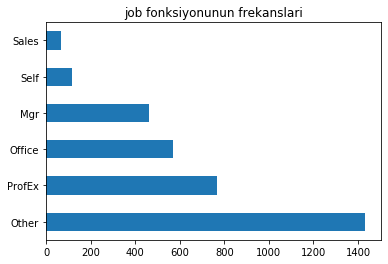

In [24]:
df["job"].value_counts().plot.barh().set_title("job fonksiyonunun frekanslari");

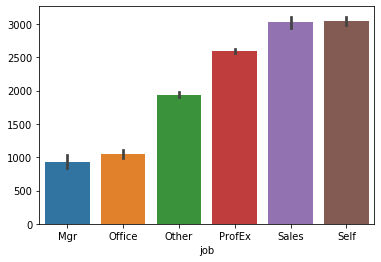

In [25]:
sns.barplot(x = "job", y = df.job.index, data= df);

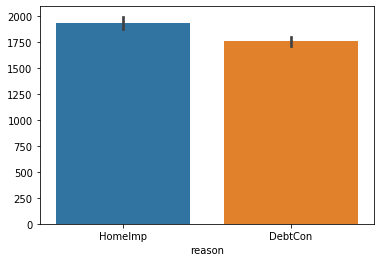

In [40]:
sns.barplot(x = "reason", y = df.reason.index, data= df);

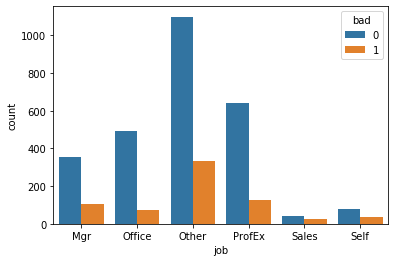

In [26]:
sns.countplot(x="job", hue="bad", data=data);

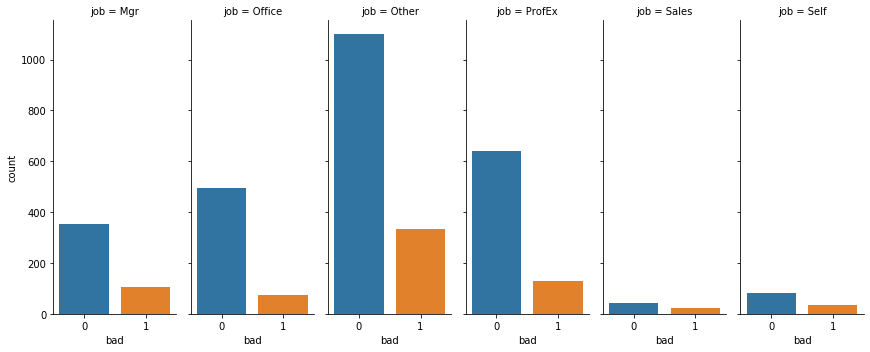

In [27]:
sns.catplot(x="bad", col="job", data=data, kind="count", aspect=.4);


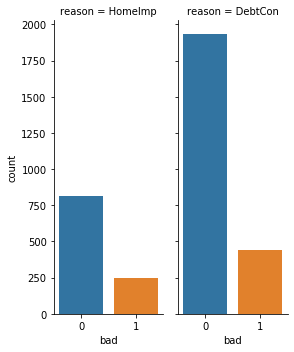

In [28]:
sns.catplot(x="bad", col="reason", data=data, kind="count", aspect=.4);

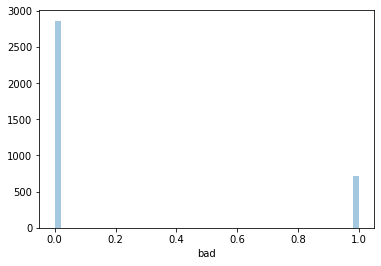

In [29]:
sns.distplot(df.bad, kde = False);

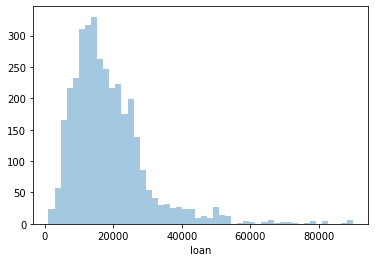

In [30]:
sns.distplot(df.loan, kde = False);

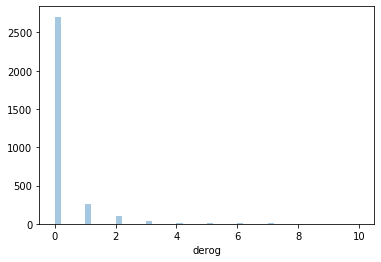

In [31]:
sns.distplot(df.derog, kde = False);

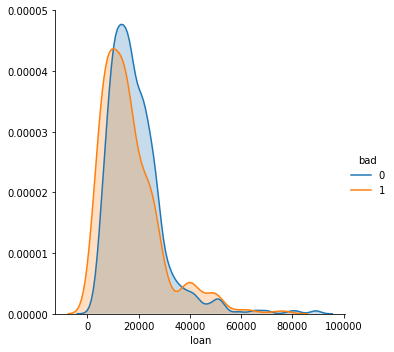

In [32]:
(sns
 .FacetGrid(df,
              hue = "bad",
              height = 5,
           )
 .map(sns.kdeplot, "loan", shade= True)
 .add_legend()
);

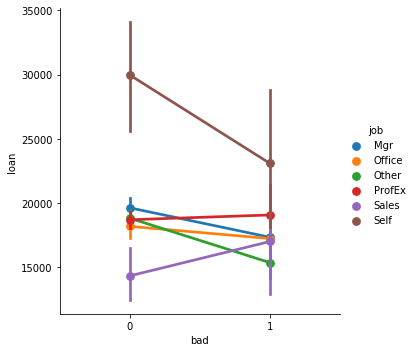

In [33]:
sns.catplot(x = "bad", y = "loan", hue = "job", kind = "point", data = df);

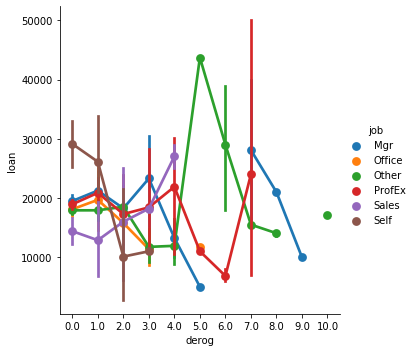

In [34]:
sns.catplot(x = "derog", y = "loan", hue = "job", kind = "point", data = df);

In [35]:
bad_job = pd.crosstab(index=data["bad"], columns=data["job"], normalize="columns")
bad_job

#columns demek % ifadeye çevirmesi

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.767896,0.86819,0.767994,0.833116,0.651515,0.704348
1,0.232104,0.13181,0.232006,0.166884,0.348485,0.295652


In [36]:
pd.crosstab([data["bad"], data["reason"]], data["job"], normalize="index")


job               Mgr    Office     Other    ProfEx     Sales      Self
bad reason                                                             
0   DebtCon  0.147216  0.172377  0.414347  0.229657  0.021413  0.014989
    HomeImp  0.088348  0.203585  0.379001  0.257362  0.003841  0.067862
1   DebtCon  0.154378  0.129032  0.460829  0.170507  0.046083  0.039171
    HomeImp  0.144033  0.078189  0.518519  0.193416  0.012346  0.053498

In [37]:
bad_derog = pd.crosstab(index=data["bad"], columns=data["derog"], normalize="columns")
bad_derog

derog,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
bad,,,,,,,,,,,
0,0.832964,0.611321,0.5,0.285714,0.285714,0.5,0.4,0.0,0.0,0.0,0.0
1,0.167036,0.388679,0.5,0.714286,0.714286,0.5,0.6,1.0,1.0,1.0,1.0


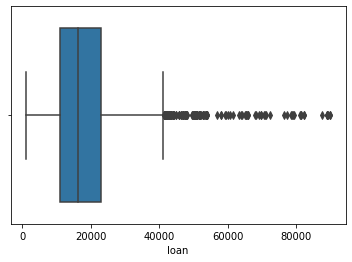

In [39]:
sns.boxplot(x = df["loan"])

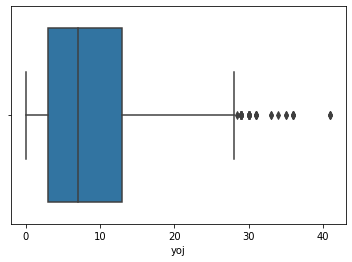

In [40]:
sns.boxplot(x = df["yoj"])

#.... gözükenler aykırı gözlem

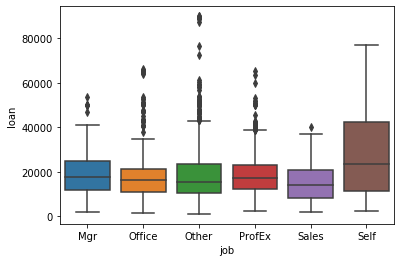

In [42]:
sns.boxplot(x = "job", y="loan", data=df)


#hangi mesleklerin talep ettiği kredi miktarı en fazla ?

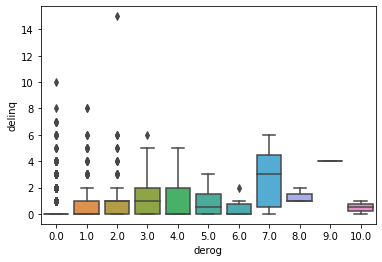

In [50]:
sns.boxplot(x = "derog", y="delinq", data=df)

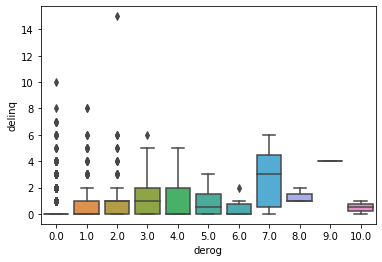

In [44]:
sns.boxplot(x = "derog", y="delinq", data=df)

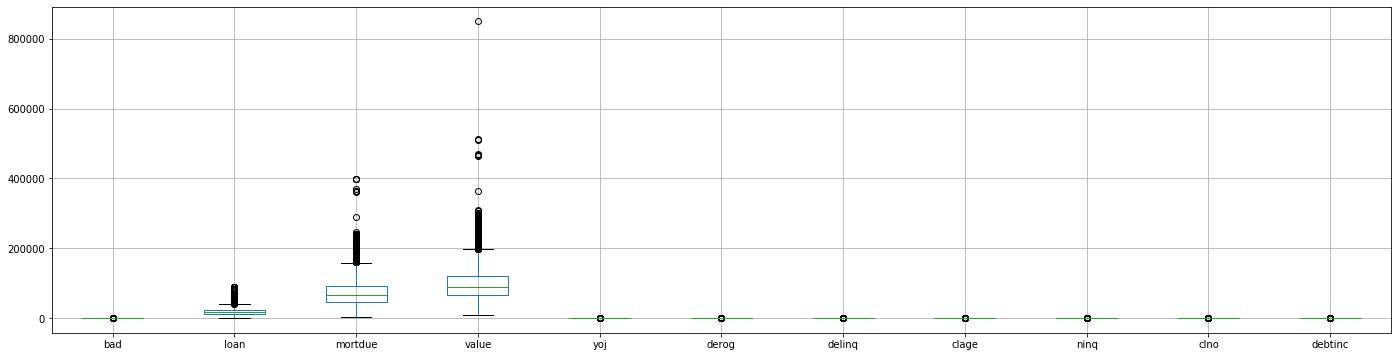

In [51]:
plt.figure(figsize=(24,6))
data.boxplot()
plt.show()

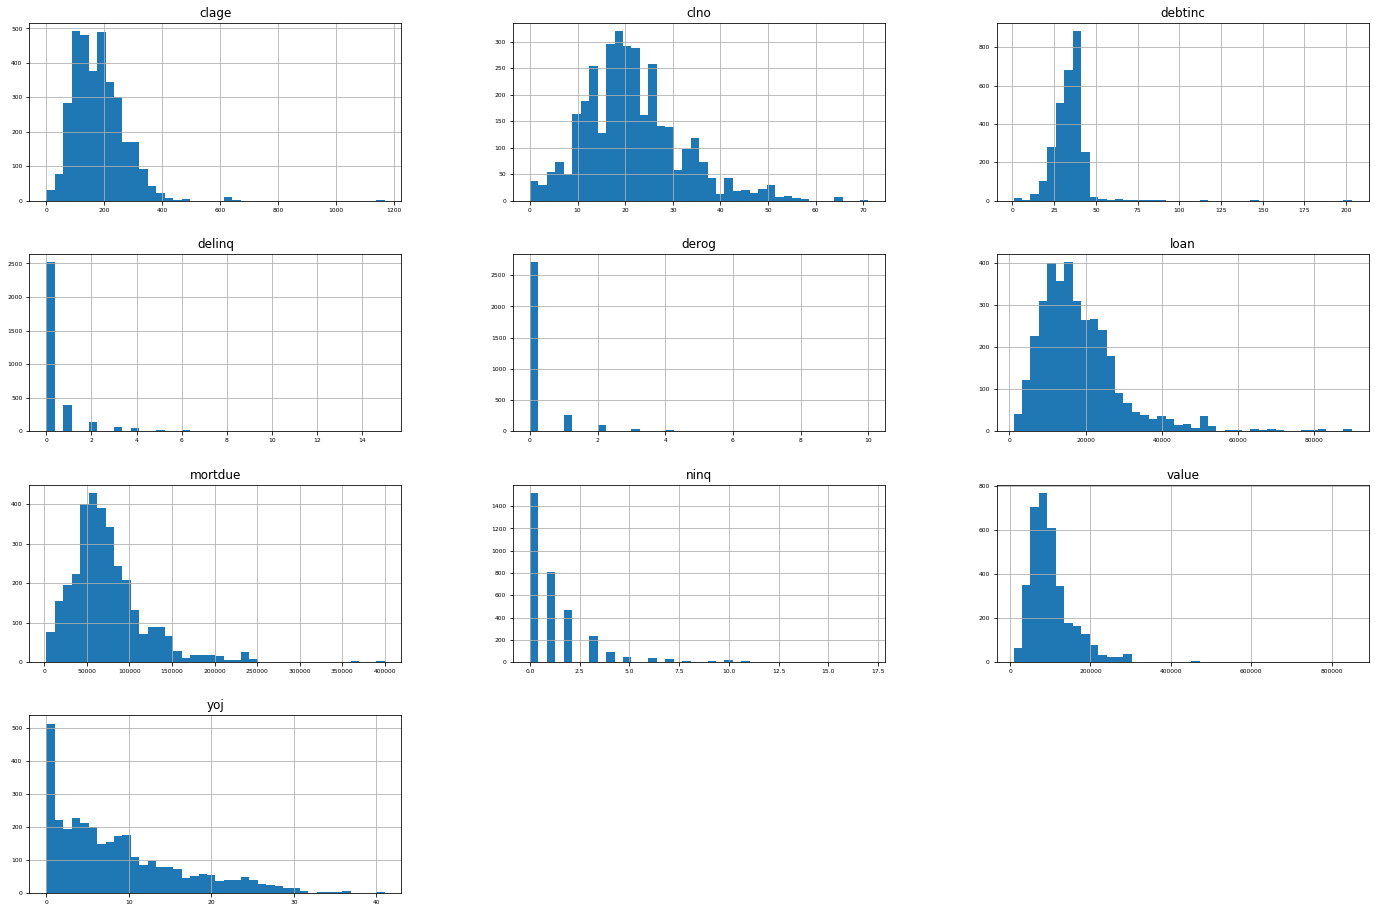

In [52]:
data2 = data.drop(["bad"], axis=1)
data2.hist(figsize=(24,16), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

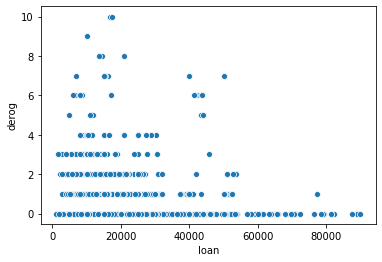

In [54]:
sns.scatterplot( x = "loan", y = "derog", data=df)

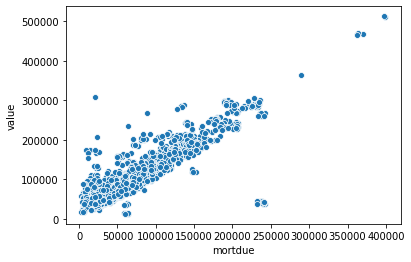

In [56]:
sns.scatterplot( x = "mortdue", y = "value", data=df)

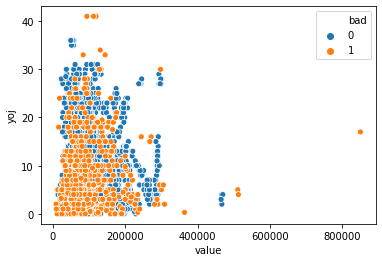

In [63]:
sns.scatterplot( x = "value", y = "yoj", hue = "bad", data=df)

In [64]:
import matplotlib.pyplot as plt

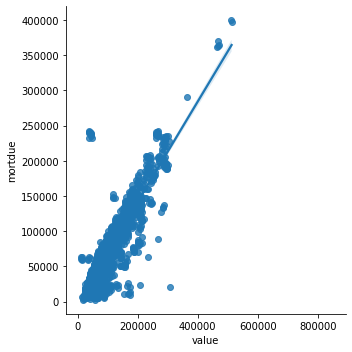

In [68]:
sns.lmplot(x = "value", y = "mortdue", data=df);

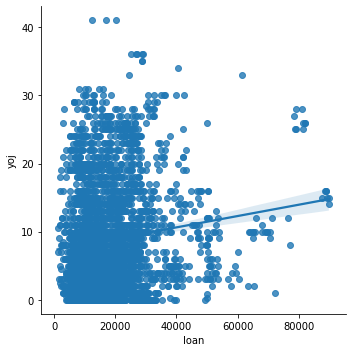

In [69]:
sns.lmplot(x = "loan", y = "yoj", data=df);

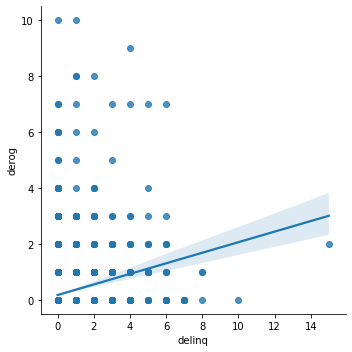

In [72]:
sns.lmplot(x = "delinq", y = "derog", data=df)

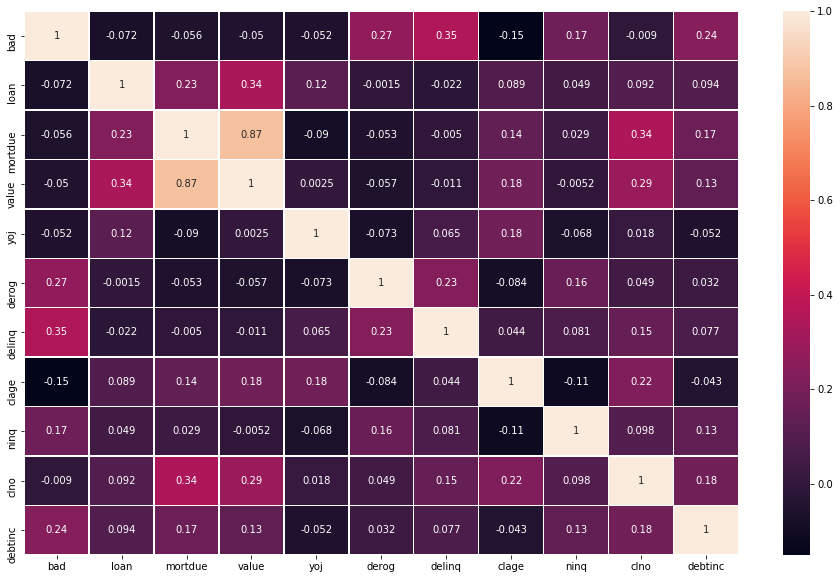

In [75]:

fig, ax = plt.subplots(figsize=(16,10))   
sns.heatmap(data.corr(), annot=True, linewidths=.3, ax=ax);

#value ile mortdue arasında büyük doğrusal bi ilişki var.